In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

### Import data

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [3]:
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [4]:
df.set_index('date', inplace=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


### Clean data

In [5]:
(df['value'] < df['value'].quantile(0.975)).value_counts()

value
True     1271
False      33
Name: count, dtype: int64

In [6]:
df = df[(df['value'] < df['value'].quantile(0.975))]
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [7]:
(df['value'] > df['value'].quantile(0.025)).value_counts()

value
True     1239
False      32
Name: count, dtype: int64

In [10]:
df = df[(df['value'] > df['value'].quantile(0.025))]
df.head(5)

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-22,21424


### Draw line plot

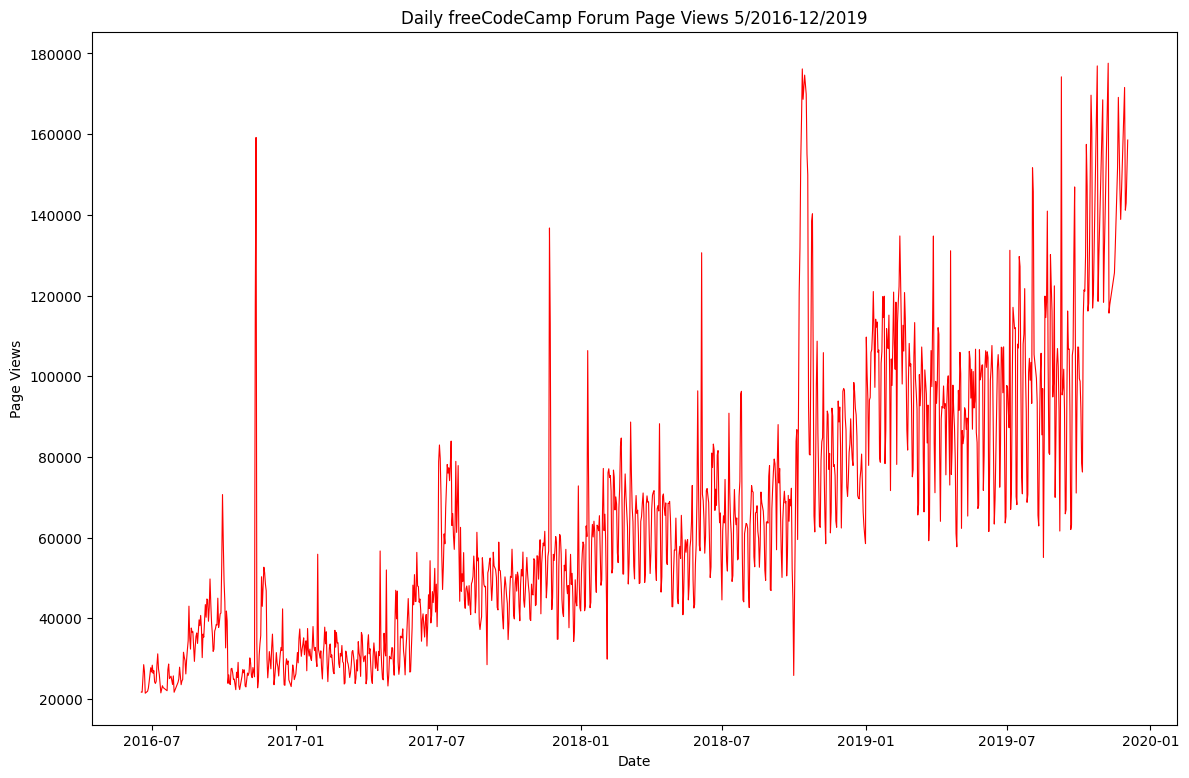

In [18]:
plt.figure(figsize=(14, 9))
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.plot(df.index, df['value'], color='red', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

 ### Copy and modify data for monthly bar plot

In [19]:
df_bar = df.copy()

In [20]:
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month

In [21]:
df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean()
df_bar = df_bar.unstack()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

### Draw bar plot

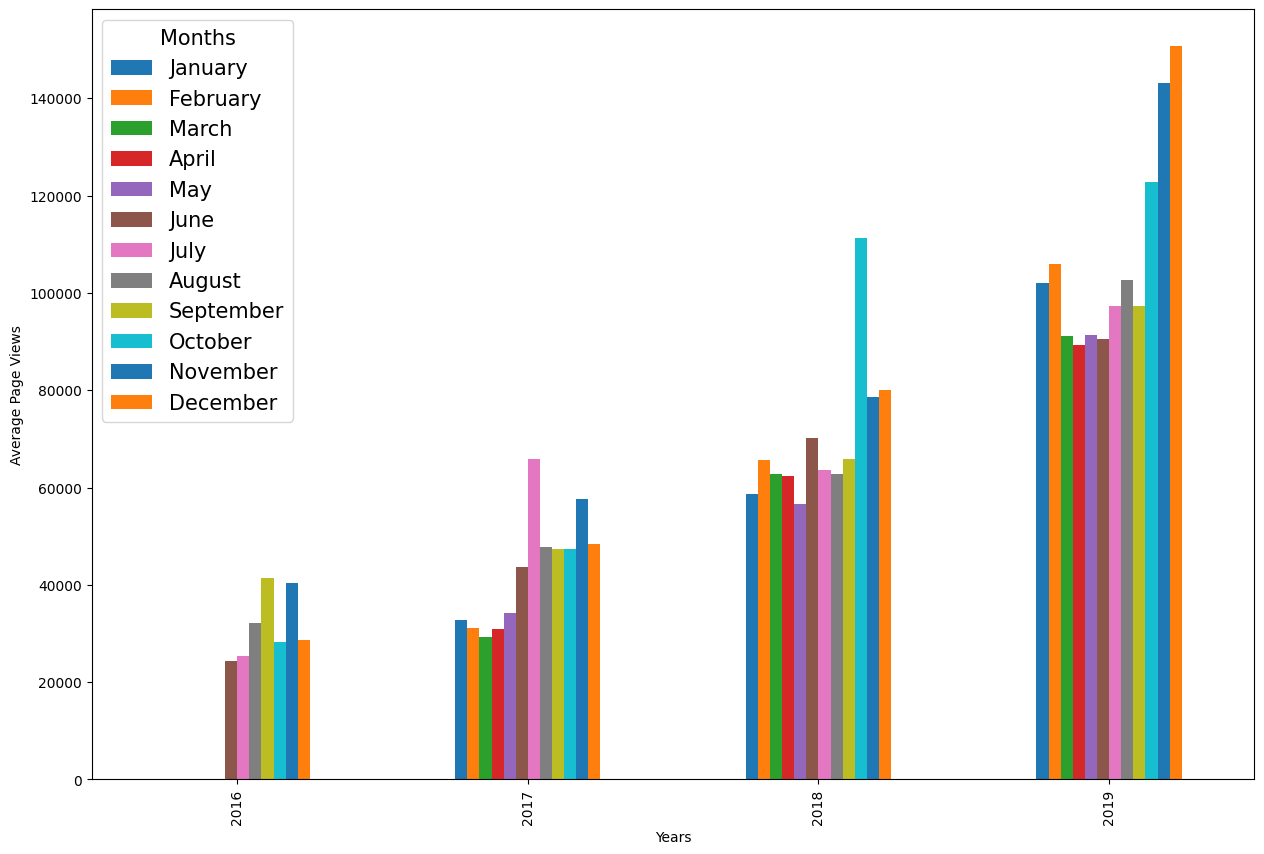

In [22]:
fig = df_bar.plot(kind='bar', figsize=(15, 10)).figure

plt.title('')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
lg = plt.legend(title='Months', fontsize=15, labels=month_names)
title = lg.get_title()
title.set_fontsize(15)

### Prepare data for box plots

In [23]:
df_box = df.copy()
df_box.reset_index(inplace=True)

In [24]:
df_box['Year'] = pd.DatetimeIndex(df_box["date"]).year
df_box['Month'] = pd.DatetimeIndex(df_box["date"]).month

### Draw box plots (using Seaborn)

Text(0, 0.5, 'Page Views')

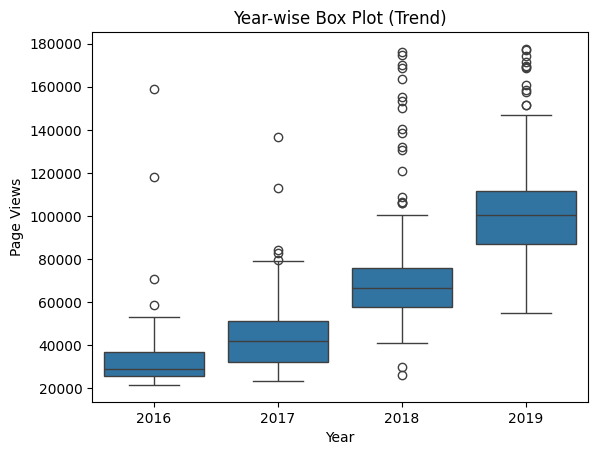

In [25]:
plt1 = sns.boxplot(x="Year", y="value", data=df_box)
plt1.set_title("Year-wise Box Plot (Trend)")
plt1.set_xlabel('Year')
plt1.set_ylabel('Page Views')

Text(0, 0.5, 'Page Views')

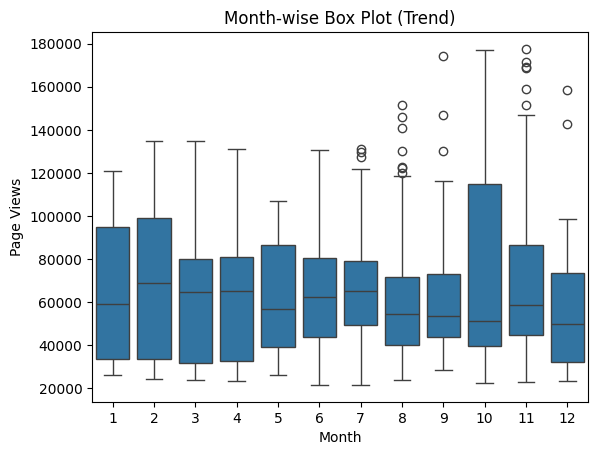

In [26]:
plt2 = sns.boxplot(x='Month', y='value', data=df_box)
plt2.set_title("Month-wise Box Plot (Trend)")
plt2.set_xlabel('Month')
plt2.set_ylabel('Page Views')